In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import json
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [73]:
df = pd.read_csv("../data/raw/DiseaseAndSymptoms.csv")

In [74]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fill NaN with 'none'

In [75]:
df.fillna('none', inplace=True)

In [76]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none


In [77]:
df.shape

(4920, 18)

Drop Dubplicates

In [78]:
df.drop_duplicates(inplace=True)

Check imBalance Data

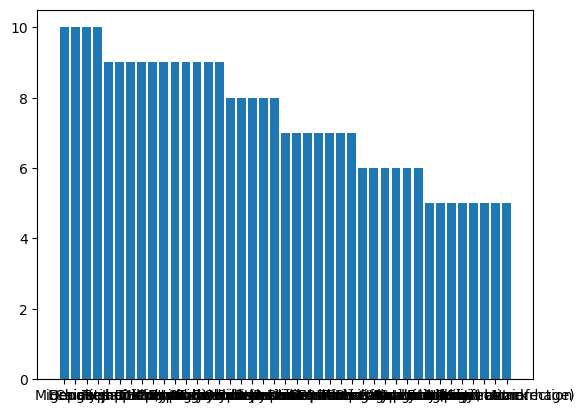

In [79]:
disease_counts = df['Disease'].value_counts()
x = disease_counts.index
y = disease_counts.values
plt.bar(x=x, height= y)
plt.show()

In [80]:
# df.to_csv("../data/processed/Cleaned_Top15Diseases.csv", index=False)

### Preprocessing


encode data

In [81]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
3,Fungal infection,itching,skin_rash,dischromic _patches,none,none,none,none,none,none,none,none,none,none,none,none,none,none
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,none,none,none,none,none,none,none,none,none,none,none,none,none,none


In [82]:
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]
all_symptoms = pd.unique(df[symptom_cols].values.ravel('K'))

In [83]:
symptom_encoder = LabelEncoder()
symptom_encoder.fit(all_symptoms)

LabelEncoder()

In [84]:
symptom_mapping = {
    str(k).strip(): int(v)
    for k, v in zip(symptom_encoder.classes_, symptom_encoder.transform(symptom_encoder.classes_))
}


In [85]:
print(symptom_mapping)

{'abdominal_pain': 0, 'abnormal_menstruation': 1, 'acidity': 2, 'acute_liver_failure': 3, 'altered_sensorium': 4, 'anxiety': 5, 'back_pain': 6, 'belly_pain': 7, 'blackheads': 8, 'bladder_discomfort': 9, 'blister': 10, 'blood_in_sputum': 11, 'bloody_stool': 12, 'blurred_and_distorted_vision': 13, 'breathlessness': 14, 'brittle_nails': 15, 'bruising': 16, 'burning_micturition': 17, 'chest_pain': 18, 'chills': 19, 'cold_hands_and_feets': 20, 'coma': 21, 'congestion': 22, 'constipation': 23, 'continuous_feel_of_urine': 24, 'continuous_sneezing': 25, 'cough': 26, 'cramps': 27, 'dark_urine': 28, 'dehydration': 29, 'depression': 30, 'diarrhoea': 31, 'dischromic _patches': 32, 'distention_of_abdomen': 33, 'dizziness': 34, 'drying_and_tingling_lips': 35, 'enlarged_thyroid': 36, 'excessive_hunger': 37, 'extra_marital_contacts': 38, 'family_history': 39, 'fast_heart_rate': 40, 'fatigue': 41, 'fluid_overload': 42, 'foul_smell_of urine': 43, 'headache': 44, 'high_fever': 45, 'hip_joint_pain': 46, '

In [86]:
for col in symptom_cols:
    df[col] = symptom_encoder.transform(df[col])


In [87]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,130,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131
1,Fungal infection,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,Fungal infection,130,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
3,Fungal infection,130,99,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
4,Fungal infection,130,99,72,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [88]:
disease_encoder = LabelEncoder()
df['Disease'] = disease_encoder.fit_transform(df['Disease'])

In [89]:
disease_mapping = {str(k): int(v) for k, v in zip(disease_encoder.classes_, disease_encoder.transform(disease_encoder.classes_))}

In [90]:
print(disease_mapping)

{'(vertigo) Paroymsal  Positional Vertigo': 0, 'AIDS': 1, 'Acne': 2, 'Alcoholic hepatitis': 3, 'Allergy': 4, 'Arthritis': 5, 'Bronchial Asthma': 6, 'Cervical spondylosis': 7, 'Chicken pox': 8, 'Chronic cholestasis': 9, 'Common Cold': 10, 'Dengue': 11, 'Diabetes ': 12, 'Dimorphic hemmorhoids(piles)': 13, 'Drug Reaction': 14, 'Fungal infection': 15, 'GERD': 16, 'Gastroenteritis': 17, 'Heart attack': 18, 'Hepatitis B': 19, 'Hepatitis C': 20, 'Hepatitis D': 21, 'Hepatitis E': 22, 'Hypertension ': 23, 'Hyperthyroidism': 24, 'Hypoglycemia': 25, 'Hypothyroidism': 26, 'Impetigo': 27, 'Jaundice': 28, 'Malaria': 29, 'Migraine': 30, 'Osteoarthristis': 31, 'Paralysis (brain hemorrhage)': 32, 'Peptic ulcer diseae': 33, 'Pneumonia': 34, 'Psoriasis': 35, 'Tuberculosis': 36, 'Typhoid': 37, 'Urinary tract infection': 38, 'Varicose veins': 39, 'hepatitis A': 40}


In [91]:
with open("../data/processed/symptom_mapping.json", "w") as f:
    json.dump(symptom_mapping, f, indent=4)

with open("../data/processed/disease_mapping.json", "w") as f:
    json.dump(disease_mapping, f, indent=4)

In [92]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,130,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131
1,15,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,15,130,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
3,15,130,99,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
4,15,130,99,72,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [93]:
disease_counts = df['Disease'].value_counts()

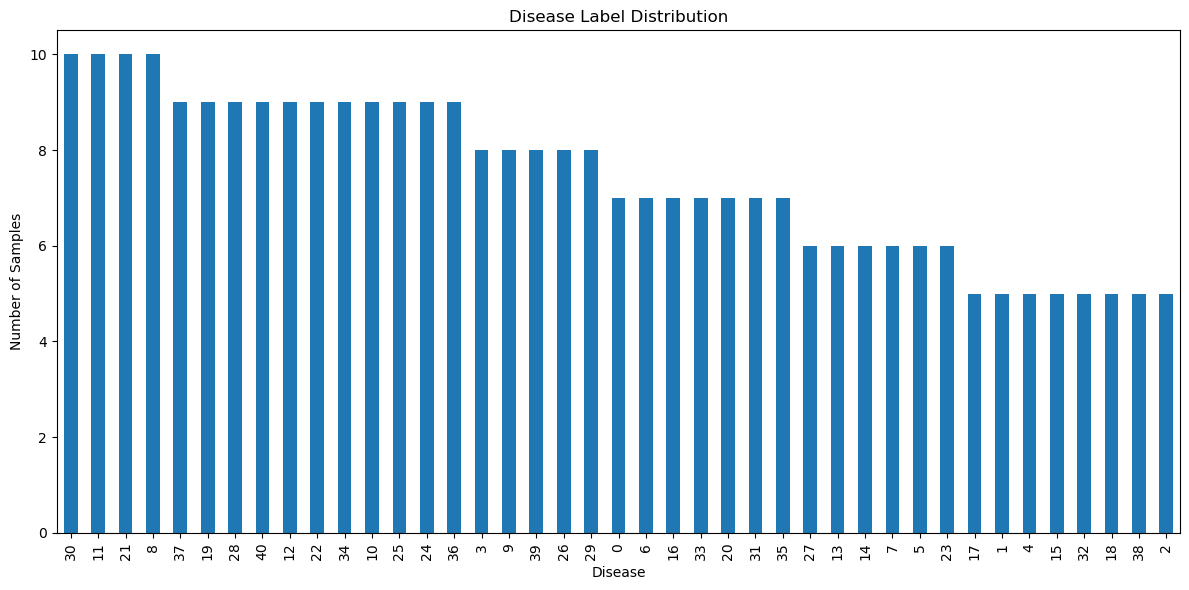

In [94]:
disease_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Disease Label Distribution")
plt.xlabel("Disease")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [95]:
X = df.drop("Disease", axis=1)
y = df["Disease"] 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [97]:
from collections import Counter

print(Counter(y)) 

Counter({30: 10, 8: 10, 11: 10, 21: 10, 12: 9, 28: 9, 37: 9, 40: 9, 19: 9, 22: 9, 36: 9, 10: 9, 34: 9, 24: 9, 25: 9, 9: 8, 29: 8, 3: 8, 39: 8, 26: 8, 16: 7, 33: 7, 6: 7, 20: 7, 31: 7, 0: 7, 35: 7, 14: 6, 23: 6, 7: 6, 13: 6, 5: 6, 27: 6, 15: 5, 4: 5, 1: 5, 17: 5, 32: 5, 18: 5, 2: 5, 38: 5})


In [98]:
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

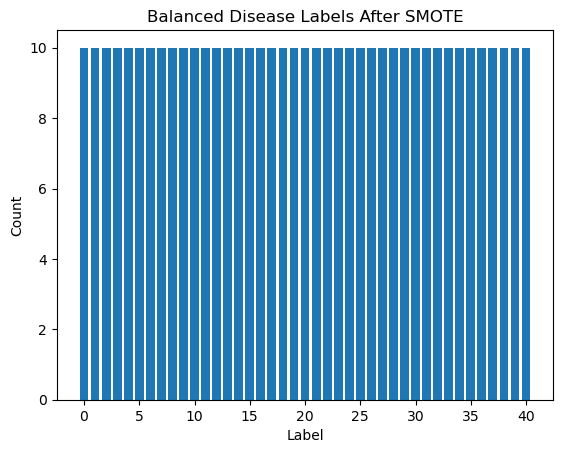

In [99]:
resampled_counts = Counter(y_resampled)

plt.bar(resampled_counts.keys(), resampled_counts.values())
plt.title("Balanced Disease Labels After SMOTE")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [100]:
balanced_df = pd.DataFrame(X_resampled)
balanced_df.insert(0, 'Disease', y_resampled)


In [101]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,130,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131
1,15,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,15,130,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
3,15,130,99,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
4,15,130,99,72,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [102]:
balanced_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,130,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131
1,15,99,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
2,15,130,72,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
3,15,130,99,32,131,131,131,131,131,131,131,131,131,131,131,131,131,131
4,15,130,99,72,131,131,131,131,131,131,131,131,131,131,131,131,131,131


In [103]:
balanced_df.to_csv("../data/processed/preprocessed_data.csv", index=False)